In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (20, 10)

import dask
import dask.dataframe as dd

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [12]:
PATH = "C:/Users/kgammie/Documents/Ad-hoc/PiT_vs_TTC/PiT_RiskDrivers/PiT_RiskDrivers/FM/"
# FILE = "sf-loan-performance-data-sample.csv"

FILE = "2007*.csv"

In [13]:
all_columns_for_data = [
    "POOL_ID", "LOAN_ID", "ACT_PERIOD", "CHANNEL", "SELLER", "SERVICER",
                        "MASTER_SERVICER", "ORIG_RATE", "CURR_RATE", "ORIG_UPB", "ISSUANCE_UPB",
                        "CURRENT_UPB", "ORIG_TERM", "ORIG_DATE", "FIRST_PAY", "LOAN_AGE",
                        "REM_MONTHS", "ADJ_REM_MONTHS", "MATR_DT", "OLTV", "OCLTV",
                        "NUM_BO", "DTI", "CSCORE_B", "CSCORE_C", "FIRST_FLAG", "PURPOSE",
                        "PROP", "NO_UNITS", "OCC_STAT", "STATE", "MSA", "ZIP", "MI_PCT",
                        "PRODUCT", "PPMT_FLG", "IO", "FIRST_PAY_IO", "MNTHS_TO_AMTZ_IO",
                        "DLQ_STATUS", "PMT_HISTORY", "MOD_FLAG", "MI_CANCEL_FLAG", "Zero_Bal_Code",
                        "ZB_DTE", "LAST_UPB", "RPRCH_DTE", "CURR_SCHD_PRNCPL", "TOT_SCHD_PRNCPL",
                        "UNSCHD_PRNCPL_CURR", "LAST_PAID_INSTALLMENT_DATE", "FORECLOSURE_DATE",
                        "DISPOSITION_DATE", "FORECLOSURE_COSTS", "PROPERTY_PRESERVATION_AND_REPAIR_COSTS",
                        "ASSET_RECOVERY_COSTS", "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS",
                        "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY", "NET_SALES_PROCEEDS",
                        "CREDIT_ENHANCEMENT_PROCEEDS", "REPURCHASES_MAKE_WHOLE_PROCEEDS",
                        "OTHER_FORECLOSURE_PROCEEDS", "NON_INTEREST_BEARING_UPB", "PRINCIPAL_FORGIVENESS_AMOUNT",
                        "ORIGINAL_LIST_START_DATE", "ORIGINAL_LIST_PRICE", "CURRENT_LIST_START_DATE",
                        "CURRENT_LIST_PRICE", "ISSUE_SCOREB", "ISSUE_SCOREC", "CURR_SCOREB",
                        "CURR_SCOREC", "MI_TYPE", "SERV_IND", "CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT",
                        "CUMULATIVE_MODIFICATION_LOSS_AMOUNT", "CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS",
                        "CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS", "HOMEREADY_PROGRAM_INDICATOR",
                        "FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT", "RELOCATION_MORTGAGE_INDICATOR",
                        "ZERO_BALANCE_CODE_CHANGE_DATE", "LOAN_HOLDBACK_INDICATOR", "LOAN_HOLDBACK_EFFECTIVE_DATE",
                        "DELINQUENT_ACCRUED_INTEREST", "PROPERTY_INSPECTION_WAIVER_INDICATOR",
                        "HIGH_BALANCE_LOAN_INDICATOR", "ARM_5_YR_INDICATOR", "ARM_PRODUCT_TYPE",
                        "MONTHS_UNTIL_FIRST_PAYMENT_RESET", "MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET",
                        "INTEREST_RATE_CHANGE_DATE", "PAYMENT_CHANGE_DATE", "ARM_INDEX",
                        "ARM_CAP_STRUCTURE", "INITIAL_INTEREST_RATE_CAP", "PERIODIC_INTEREST_RATE_CAP",
                        "LIFETIME_INTEREST_RATE_CAP", "MARGIN", "BALLOON_INDICATOR",
                        "PLAN_NUMBER", "FORBEARANCE_INDICATOR", "HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR",
                        "DEAL_NAME", "RE_PROCS_FLAG", "ADR_TYPE", "ADR_COUNT", "ADR_UPB"
]

all_dtypes_for_data = {
    "POOL_ID": str, "LOAN_ID": str, "ACT_PERIOD": str, "CHANNEL": str, "SELLER": str, "SERVICER": str,
                        "MASTER_SERVICER": str, "ORIG_RATE": float, "CURR_RATE": str, "ORIG_UPB": str, "ISSUANCE_UPB": str,
                        "CURRENT_UPB": str, "ORIG_TERM": str, "ORIG_DATE": str, "FIRST_PAY": str, "LOAN_AGE": str,
                        "REM_MONTHS": str, "ADJ_REM_MONTHS": str, "MATR_DT": str, "OLTV": str, "OCLTV": str,
                        "NUM_BO": str, "DTI": str, "CSCORE_B": str, "CSCORE_C": str, "FIRST_FLAG": str, "PURPOSE": str,
                        "PROP": str, "NO_UNITS": str, "OCC_STAT": str, "STATE": str, "MSA": str, "ZIP": str, "MI_PCT": str,
                        "PRODUCT": str, "PPMT_FLG": str, "IO": str, "FIRST_PAY_IO": str, "MNTHS_TO_AMTZ_IO": str,
                        "DLQ_STATUS": str, "PMT_HISTORY": str, "MOD_FLAG": str, "MI_CANCEL_FLAG": str, "Zero_Bal_Code": str,
                        "ZB_DTE": str, "LAST_UPB": str, "RPRCH_DTE": str, "CURR_SCHD_PRNCPL": str, "TOT_SCHD_PRNCPL": str,
                        "UNSCHD_PRNCPL_CURR": str , "LAST_PAID_INSTALLMENT_DATE": str, "FORECLOSURE_DATE": str,
                        "DISPOSITION_DATE": str, "FORECLOSURE_COSTS": str, "PROPERTY_PRESERVATION_AND_REPAIR_COSTS": str,
                        "ASSET_RECOVERY_COSTS": str, "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS": str,
                        "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY": str, "NET_SALES_PROCEEDS": str,
                        "CREDIT_ENHANCEMENT_PROCEEDS": str, "REPURCHASES_MAKE_WHOLE_PROCEEDS": str,
                        "OTHER_FORECLOSURE_PROCEEDS": str, "NON_INTEREST_BEARING_UPB": str, "PRINCIPAL_FORGIVENESS_AMOUNT": str,
                        "ORIGINAL_LIST_START_DATE": str, "ORIGINAL_LIST_PRICE": str, "CURRENT_LIST_START_DATE": str,
                        "CURRENT_LIST_PRICE": str, "ISSUE_SCOREB": str, "ISSUE_SCOREC": str, "CURR_SCOREB": str,
                        "CURR_SCOREC": str, "MI_TYPE": str, "SERV_IND": str, "CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT": str,
                        "CUMULATIVE_MODIFICATION_LOSS_AMOUNT": str, "CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS": str,
                        "CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS": str, "HOMEREADY_PROGRAM_INDICATOR": str,
                        "FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT": str, "RELOCATION_MORTGAGE_INDICATOR": str,
                        "ZERO_BALANCE_CODE_CHANGE_DATE": str, "LOAN_HOLDBACK_INDICATOR": str, "LOAN_HOLDBACK_EFFECTIVE_DATE": str,
                        "DELINQUENT_ACCRUED_INTEREST": str, "PROPERTY_INSPECTION_WAIVER_INDICATOR": str,
                        "HIGH_BALANCE_LOAN_INDICATOR": str, "ARM_5_YR_INDICATOR": str, "ARM_PRODUCT_TYPE": str,
                        "MONTHS_UNTIL_FIRST_PAYMENT_RESET": str, "MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET": str,
                        "INTEREST_RATE_CHANGE_DATE": str, "PAYMENT_CHANGE_DATE": str, "ARM_INDEX": str,
                        "ARM_CAP_STRUCTURE": str, "INITIAL_INTEREST_RATE_CAP": str, "PERIODIC_INTEREST_RATE_CAP": str,
                        "LIFETIME_INTEREST_RATE_CAP": str, "MARGIN": str, "BALLOON_INDICATOR": str,
                        "PLAN_NUMBER": str, "FORBEARANCE_INDICATOR": str, "HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR": str,
                        "DEAL_NAME": str, "RE_PROCS_FLAG": str, "ADR_TYPE": str, "ADR_COUNT": str, "ADR_UPB": str,
}

cols_to_use = [
"LOAN_ID",
"ORIG_RATE",
"CURR_RATE",
"ORIG_UPB",
"CURRENT_UPB",
"ORIG_TERM",
"ORIG_DATE",
"FIRST_PAY",
"LOAN_AGE",
"MATR_DT",
"OLTV",
"NUM_BO",
"DTI",
"CSCORE_B",
"CSCORE_C",
"FIRST_FLAG",
"PURPOSE",
"PROP",
"NO_UNITS",
"OCC_STAT",
"MI_PCT",
"PRODUCT",
"PPMT_FLG",
"IO",
"DLQ_STATUS",
"MOD_FLAG",
"Zero_Bal_Code",
"ZB_DTE",
"LAST_UPB",
"TOT_SCHD_PRNCPL",
"NON_INTEREST_BEARING_UPB",
"MI_TYPE",
]

In [14]:
# import itertools as IT

# def valid(chunks):
#     for chunk in chunks:
#         mask = chunk['STATE']=='NY'
#         if mask.all():
#             yield chunk
#         else:
#             yield chunk.loc[mask]
#             break

# chunksize = 10 ** 5
# chunks = pd.read_csv(PATH + FILE, chunksize=chunksize, sep="|", header=0, names=all_columns_for_data, dtype=str)
# df = pd.concat(valid(chunks))

# len(df)

In [113]:
x = pd.read_csv(PATH + "2007Q1.csv", sep="|", header=0, names=all_columns_for_data, dtype=str, nrows=10000)
x = x.loc[x['STATE']=='NY']
x.head()

,POOL_ID,LOAN_ID,ACT_PERIOD,CHANNEL,SELLER,SERVICER,MASTER_SERVICER,ORIG_RATE,CURR_RATE,ORIG_UPB,ISSUANCE_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,FIRST_PAY,LOAN_AGE,REM_MONTHS,ADJ_REM_MONTHS,MATR_DT,OLTV,OCLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MSA,ZIP,MI_PCT,PRODUCT,PPMT_FLG,IO,FIRST_PAY_IO,MNTHS_TO_AMTZ_IO,DLQ_STATUS,PMT_HISTORY,MOD_FLAG,MI_CANCEL_FLAG,Zero_Bal_Code,ZB_DTE,LAST_UPB,RPRCH_DTE,CURR_SCHD_PRNCPL,TOT_SCHD_PRNCPL,UNSCHD_PRNCPL_CURR,...,NET_SALES_PROCEEDS,CREDIT_ENHANCEMENT_PROCEEDS,REPURCHASES_MAKE_WHOLE_PROCEEDS,OTHER_FORECLOSURE_PROCEEDS,NON_INTEREST_BEARING_UPB,PRINCIPAL_FORGIVENESS_AMOUNT,ORIGINAL_LIST_START_DATE,ORIGINAL_LIST_PRICE,CURRENT_LIST_START_DATE,CURRENT_LIST_PRICE,ISSUE_SCOREB,ISSUE_SCOREC,CURR_SCOREB,CURR_SCOREC,MI_TYPE,SERV_IND,CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT,CUMULATIVE_MODIFICATION_LOSS_AMOUNT,CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS,CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS,HOMEREADY_PROGRAM_INDICATOR,FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT,RELOCATION_MORTGAGE_INDICATOR,ZERO_BALANCE_CODE_CHANGE_DATE,LOAN_HOLDBACK_INDICATOR,LOAN_HOLDBACK_EFFECTIVE_DATE,DELINQUENT_ACCRUED_INTEREST,PROPERTY_INSPECTION_WAIVER_INDICATOR,HIGH_BALANCE_LOAN_INDICATOR,ARM_5_YR_INDICATOR,ARM_PRODUCT_TYPE,MONTHS_UNTIL_FIRST_PAYMENT_RESET,MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET,INTEREST_RATE_CHANGE_DATE,PAYMENT_CHANGE_DATE,ARM_INDEX,ARM_CAP_STRUCTURE,INITIAL_INTEREST_RATE_CAP,PERIODIC_INTEREST_RATE_CAP,LIFETIME_INTEREST_RATE_CAP,MARGIN,BALLOON_INDICATOR,PLAN_NUMBER,FORBEARANCE_INDICATOR,HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR,DEAL_NAME,RE_PROCS_FLAG,ADR_TYPE,ADR_COUNT,ADR_UPB
839,NaN,100063382477,032007,C,"Gmac Mortgage, Llc","Gmac Mortgage, Llc",NaN,6.125,6.125,374000.00,NaN,0.00,360,012007,042007,0,360,359,032037,74,74,2,53,658,675,N,C,SF,1,P,NY,35620,115,NaN,FRM,N,N,NaN,NaN,00,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
840,NaN,100063382477,042007,C,"Gmac Mortgage, Llc","Gmac Mortgage, Llc",NaN,6.125,6.125,374000.00,NaN,0.00,360,012007,042007,1,359,359,032037,74,74,2,53,658,675,N,C,SF,1,P,NY,35620,115,NaN,FRM,N,N,NaN,NaN,00,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
841,NaN,100063382477,052007,C,"Gmac Mortgage, Llc","Gmac Mortgage, Llc",NaN,6.125,6.125,374000.00,NaN,0.00,360,012007,042007,2,358,358,032037,74,74,2,53,658,675,N,C,SF,1,P,NY,35620,115,NaN,FRM,N,N,NaN,NaN,00,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
842,NaN,100063382477,062007,C,"Gmac Mortgage, Llc","Gmac Mortgage, Llc",NaN,6.125,6.125,374000.00,NaN,0.00,360,012007,042007,3,357,357,032037,74,74,2,53,658,675,N,C,SF,1,P,NY,35620,115,NaN,FRM,N,N,NaN,NaN,00,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
843,NaN,100063382477,072007,C,"Gmac Mortgage, Llc","Gmac Mortgage, Llc",NaN,6.125,6.125,374000.00,NaN,0.00,360,012007,042007,4,356,356,032037,74,74,2,53,658,675,N,C,SF,1,P,NY,35620,115,NaN,FRM,N,N,NaN,NaN,00,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN


In [114]:
x['MSA'].unique()

array(['35620', '15380', '24020'], dtype=object)

In [15]:
dd_pit = dd.read_csv(PATH + FILE, sep="|", header=0, names=all_columns_for_data, dtype=str)
dd_pit = dd_pit.loc[dd_pit['STATE']=='NY']
dd_pit = dd_pit[cols_to_use]


In [16]:
# dd_pit.compute()

In [17]:
# 711220 * 4
#2844880
# 14_224_400

# cleaning

## dealing with nans

In [18]:
nans_to_fill = {
    'CURR_RATE': '-1.00',
    'LOAN_AGE': '-1',
    'NUM_BO': '-1',
    'MATR_DT': '122099',
    'DTI': '-1',
    'CSCORE_B': '-1',
    'CSCORE_C': '-1',
    'FIRST_FLAG': 'U',
    'MI_PCT': '-1.00',
    'PPMT_FLG': 'U',
    'IO': 'U',
    'MOD_FLAG': 'U',
    'Zero_Bal_Code': '00',
    'ZB_DTE': '012000',
    'LAST_UPB': '-999999.99',
    'TOT_SCHD_PRNCPL': '-999999.99',
    'NON_INTEREST_BEARING_UPB': '-999999.99',
    'MI_TYPE': '0',
    'DLQ_STATUS': 'XX'
}


dd_pit = dd_pit.fillna(nans_to_fill)

## get all dtypes in their appropriate format

In [29]:
# convert str to correct dtype 
float_columns = [
    'ORIG_RATE', 
    'CURR_RATE',
    'ORIG_UPB',
    'CURRENT_UPB',
    'MI_PCT',
    'LAST_UPB',
    'TOT_SCHD_PRNCPL',
    'NON_INTEREST_BEARING_UPB',
]

int_columns = [
    'ORIG_TERM',
    'LOAN_AGE',
    'NUM_BO',
    # 'REM_MONTHS',
    # 'ADJ_REM_MONTHS',
    'OLTV',
    'NUM_BO',
    'CSCORE_B',
    'CSCORE_C',
    'NO_UNITS',
    'MI_TYPE',
    'DTI',
    'DLQ_STATUS'
]

date_columns = [
    'ORIG_DATE',
    'FIRST_PAY',
    'MATR_DT',
    'ZB_DTE',
]

In [20]:
# # str -> float
# dd_pit[float_columns] = dd_pit[float_columns].astype('float')

# # str -> float (will convert to int after nans have been dealt with)
# dd_pit[int_columns] = dd_pit[int_columns].astype('int32')

# str -> date in two steps
## step 1: convert to dt
# dd_pit[date_columns] = dd_pit[date_columns].apply(dd.to_datetime, axis=1)
# dd_pit[date_columns] = dd_pit[date_columns].apply(dd.to_datetime, axis=1)

dd_clean = dd_pit[dd_pit['DLQ_STATUS'] != 'XX']
# dd_clean['DLQ_STATUS'] = dd_clean['DLQ_STATUS'].astype('int')

## step 2: remove days from dates only have month and year for multiple columns 
# for dt_col in date_columns:
#     pit_data[dt_col] = pit_data[dt_col].apply(lambda x: x.strftime('%Y-%m'))

# dd_pit['current_month'] = (dd_pit["ORIG_DATE"] + pd.to_timedelta(dd_pit['LOAN_AGE']*31,'d')) + pd.offsets.MonthEnd(0)

# pit_data.info()

In [21]:
dd_clean.dtypes 

LOAN_ID                     object
ORIG_RATE                   object
CURR_RATE                   object
ORIG_UPB                    object
CURRENT_UPB                 object
ORIG_TERM                   object
ORIG_DATE                   object
FIRST_PAY                   object
LOAN_AGE                    object
MATR_DT                     object
OLTV                        object
NUM_BO                      object
DTI                         object
CSCORE_B                    object
CSCORE_C                    object
FIRST_FLAG                  object
PURPOSE                     object
PROP                        object
NO_UNITS                    object
OCC_STAT                    object
MI_PCT                      object
PRODUCT                     object
PPMT_FLG                    object
IO                          object
DLQ_STATUS                  object
MOD_FLAG                    object
Zero_Bal_Code               object
ZB_DTE                      object
LAST_UPB            

In [22]:
clean_df = dd_clean.compute()

In [30]:
clean_df['LOAN_ID'].nunique()

48256

In [23]:
clean_df.info()
# 3_297_373 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297373 entries, 839 to 154673
Data columns (total 32 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   LOAN_ID                   object
 1   ORIG_RATE                 object
 2   CURR_RATE                 object
 3   ORIG_UPB                  object
 4   CURRENT_UPB               object
 5   ORIG_TERM                 object
 6   ORIG_DATE                 object
 7   FIRST_PAY                 object
 8   LOAN_AGE                  object
 9   MATR_DT                   object
 10  OLTV                      object
 11  NUM_BO                    object
 12  DTI                       object
 13  CSCORE_B                  object
 14  CSCORE_C                  object
 15  FIRST_FLAG                object
 16  PURPOSE                   object
 17  PROP                      object
 18  NO_UNITS                  object
 19  OCC_STAT                  object
 20  MI_PCT                    object
 21  PRODUCT

In [28]:
# clean_df.to_parquet(PATH + 'clean_data.parquet')

## var creation

da

In [32]:
date_columns 

['ORIG_DATE', 'FIRST_PAY', 'MATR_DT', 'ZB_DTE']

## creating variables 

In [ ]:
# str -> float
clean_df[float_columns] = clean_df[float_columns].astype('float')

# str -> float (will convert to int after nans have been dealt with)
clean_df[int_columns] = clean_df[int_columns].astype('int32')

# str -> date in two steps
# step 1: convert to dt
clean_df[date_columns] = clean_df[date_columns].apply(pd.to_datetime, axis=1)

# step 2: remove days from dates only have month and year for multiple columns 
# for dt_col in date_columns:
#     pit_data[dt_col] = pit_data[dt_col].apply(lambda x: x.strftime('%Y-%m'))

clean_df['current_month'] = (dd_pit["ORIG_DATE"] + pd.to_timedelta(dd_pit['LOAN_AGE']*31,'d')) + pd.offsets.MonthEnd(0)



In [ ]:
# to do
# include
# in addition to this  a var which looks at teh time to default (intersted in the TMV compinent - how to dsicount this)

In [218]:
# if dql_status == 12, then default_12m = 1
# if dql_status between 12 and 24, then default_24m = 1
clean_df['default_12m'] = np.where(clean_df['DLQ_STATUS'].between(3, 12), 1, 0)
clean_df['default_24m'] = np.where(clean_df['DLQ_STATUS'].between(13, 24), 1, 0)
clean_df['default_24m_plus'] = np.where(clean_df['DLQ_STATUS'] > 24, 1, 0)
clean_df.head()


c:\Users\kgammie\Anaconda3_\envs\plotly_eda_3.8\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,LOAN_ID,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,FIRST_PAY,LOAN_AGE,REM_MONTHS,ADJ_REM_MONTHS,MATR_DT,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,MI_PCT,PRODUCT,PPMT_FLG,IO,DLQ_STATUS,MOD_FLAG,Zero_Bal_Code,ZB_DTE,LAST_UPB,TOT_SCHD_PRNCPL,NON_INTEREST_BEARING_UPB,MI_TYPE,current_month,default_12m,default_24m,default_24m_plus
0,100001007633,5.875,5.875,190000.0,0.0,360,2007-02-20,2007-04-20,2,358,357,2037-03-20,80,2,27,802,817,N,P,SF,1,P,-1.0,FRM,N,N,0,N,00,2000-01-20,-999999.99,-999999.99,-999999.99,0,2007-04-30,0,0,0
1,100001007633,5.875,5.875,190000.0,0.0,360,2007-02-20,2007-04-20,3,357,356,2037-03-20,80,2,27,802,817,N,P,SF,1,P,-1.0,FRM,N,N,0,N,00,2000-01-20,-999999.99,-999999.99,-999999.99,0,2007-05-31,0,0,0
2,100001007633,5.875,5.875,190000.0,0.0,360,2007-02-20,2007-04-20,4,356,355,2037-03-20,80,2,27,802,817,N,P,SF,1,P,-1.0,FRM,N,N,0,N,00,2000-01-20,-999999.99,-999999.99,-999999.99,0,2007-06-30,0,0,0
3,100001007633,5.875,5.875,190000.0,0.0,360,2007-02-20,2007-04-20,5,355,355,2037-03-20,80,2,27,802,817,N,P,SF,1,P,-1.0,FRM,N,N,0,N,00,2000-01-20,-999999.99,-999999.99,-999999.99,0,2007-07-31,0,0,0
4,100001007633,5.875,5.875,190000.0,0.0,360,2007-02-20,2007-04-20,6,354,353,2037-03-20,80,2,27,802,817,N,P,SF,1,P,-1.0,FRM,N,N,0,N,00,2000-01-20,-999999.99,-999999.99,-999999.99,0,2007-08-31,0,0,0


In [238]:
# change dti to int
clean_df['DTI'] = clean_df['DTI'].astype('int')

c:\Users\kgammie\Anaconda3_\envs\plotly_eda_3.8\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:xlabel='default_12m'>

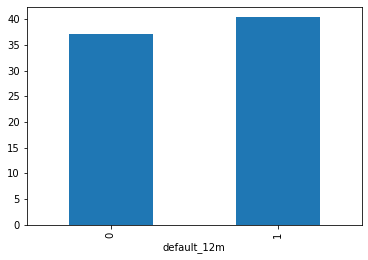

In [240]:
# plot dti vs dlq_status
clean_df.groupby('default_12m').mean()['DTI'].plot(kind='bar')

<AxesSubplot:xlabel='DTI', ylabel='Count'>

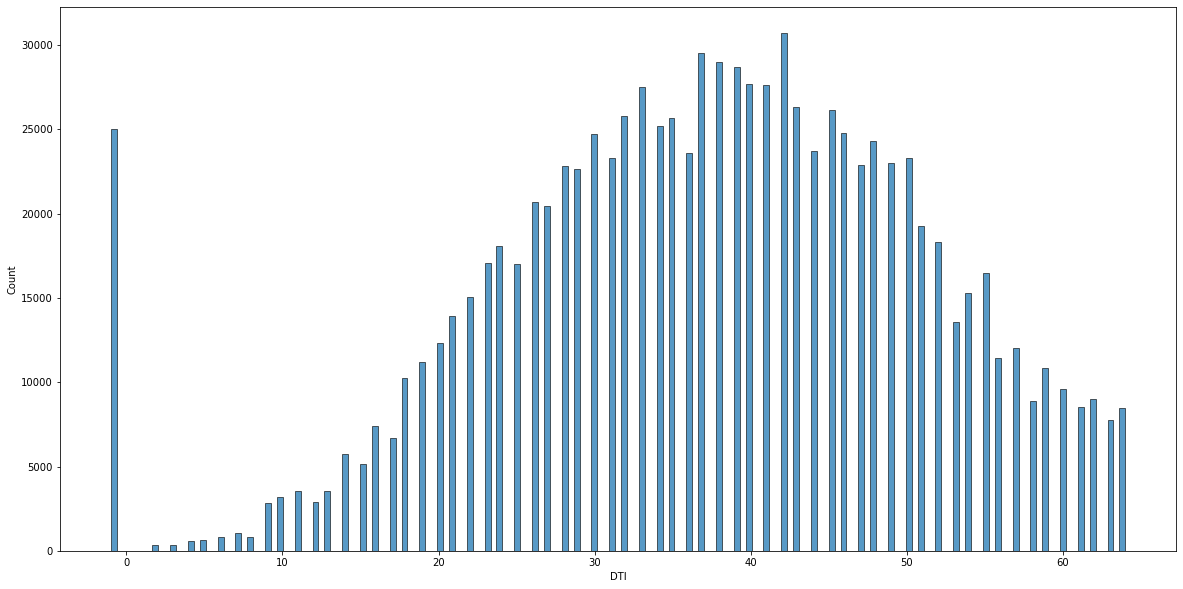

In [244]:
# plot dti 
sns.histplot(clean_df['DTI'])

In [224]:
# plot the histogram of dql_status
def_cols = ['default_12m', 'default_24m', 'default_24m_plus']
for def_col in def_cols:
    print(def_col,"\n" ,clean_df[def_col].value_counts())

default_12m 
 0    956762
1     28627
Name: default_12m, dtype: int64
default_24m 
 0    976022
1      9367
Name: default_24m, dtype: int64
default_24m_plus 
 0    977874
1      7515
Name: default_24m_plus, dtype: int64


In [225]:
clean_df['LOAN_ID'].nunique()

15853

In [252]:
# get unique value for variables with dtype = object
obj_cols = (clean_df.select_dtypes(include=['object']).columns).to_list()
obj_cols.remove('LOAN_ID')


for obj_col in obj_cols:
    print(obj_col, "\n", clean_df[obj_col].unique())
    print("\n")

FIRST_FLAG 
 ['N' 'Y' 'U']


PURPOSE 
 ['P' 'R' 'C']


PROP 
 ['SF' 'PU' 'CO' 'CP' 'MH']


OCC_STAT 
 ['P' 'I' 'S']


PRODUCT 
 ['FRM']


PPMT_FLG 
 ['N' 'U']


IO 
 ['N' 'U']


MOD_FLAG 
 ['N' 'Y' 'U']


Zero_Bal_Code 
 ['00' '01' '16' '15' '09' '02']




## get dummies 


In [253]:
# convert categorical variables to dummies
dummies_clean_df = pd.get_dummies(clean_df, columns=obj_cols)
dummies_clean_df.head()


,LOAN_ID,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,FIRST_PAY,LOAN_AGE,REM_MONTHS,ADJ_REM_MONTHS,MATR_DT,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,NO_UNITS,MI_PCT,DLQ_STATUS,ZB_DTE,LAST_UPB,TOT_SCHD_PRNCPL,NON_INTEREST_BEARING_UPB,MI_TYPE,current_month,default_12m,default_24m,default_24m_plus,FIRST_FLAG_N,FIRST_FLAG_U,FIRST_FLAG_Y,PURPOSE_C,PURPOSE_P,PURPOSE_R,PROP_CO,PROP_CP,PROP_MH,PROP_PU,PROP_SF,OCC_STAT_I,OCC_STAT_P,OCC_STAT_S,PRODUCT_FRM,PPMT_FLG_N,PPMT_FLG_U,IO_N,IO_U,MOD_FLAG_N,MOD_FLAG_U,MOD_FLAG_Y,Zero_Bal_Code_00,Zero_Bal_Code_01,Zero_Bal_Code_02,Zero_Bal_Code_09,Zero_Bal_Code_15,Zero_Bal_Code_16
0,100001007633,5.875,5.875,190000.0,0.0,360,2007-02-20,2007-04-20,2,358,357,2037-03-20,80,2,27,802,817,1,-1.0,0,2000-01-20,-999999.99,-999999.99,-999999.99,0,2007-04-30,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0
1,100001007633,5.875,5.875,190000.0,0.0,360,2007-02-20,2007-04-20,3,357,356,2037-03-20,80,2,27,802,817,1,-1.0,0,2000-01-20,-999999.99,-999999.99,-999999.99,0,2007-05-31,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0
2,100001007633,5.875,5.875,190000.0,0.0,360,2007-02-20,2007-04-20,4,356,355,2037-03-20,80,2,27,802,817,1,-1.0,0,2000-01-20,-999999.99,-999999.99,-999999.99,0,2007-06-30,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0
3,100001007633,5.875,5.875,190000.0,0.0,360,2007-02-20,2007-04-20,5,355,355,2037-03-20,80,2,27,802,817,1,-1.0,0,2000-01-20,-999999.99,-999999.99,-999999.99,0,2007-07-31,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0
4,100001007633,5.875,5.875,190000.0,0.0,360,2007-02-20,2007-04-20,6,354,353,2037-03-20,80,2,27,802,817,1,-1.0,0,2000-01-20,-999999.99,-999999.99,-999999.99,0,2007-08-31,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0


## correlations 

In [254]:
# correlation matrix
corr_matrix = dummies_clean_df.corr()
corr_matrix['DLQ_STATUS'].sort_values(ascending=False)


DLQ_STATUS                  1.000000
default_24m_plus            0.822167
default_24m                 0.370822
default_12m                 0.217748
LOAN_AGE                    0.092550
ORIG_RATE                   0.068935
CURRENT_UPB                 0.061919
MOD_FLAG_Y                  0.049403
NON_INTEREST_BEARING_UPB    0.048924
ORIG_TERM                   0.046634
IO_N                        0.044994
MI_PCT                      0.043498
MI_TYPE                     0.040680
OLTV                        0.033036
DTI                         0.032080
PURPOSE_C                   0.027250
ORIG_UPB                    0.023632
Zero_Bal_Code_02            0.019295
OCC_STAT_P                  0.014629
Zero_Bal_Code_09            0.007997
REM_MONTHS                  0.006637
FIRST_FLAG_N                0.005001
PPMT_FLG_U                  0.003756
TOT_SCHD_PRNCPL             0.003417
PROP_SF                     0.003256
PROP_CO                     0.003014
Zero_Bal_Code_00            0.001714
P

<AxesSubplot:>

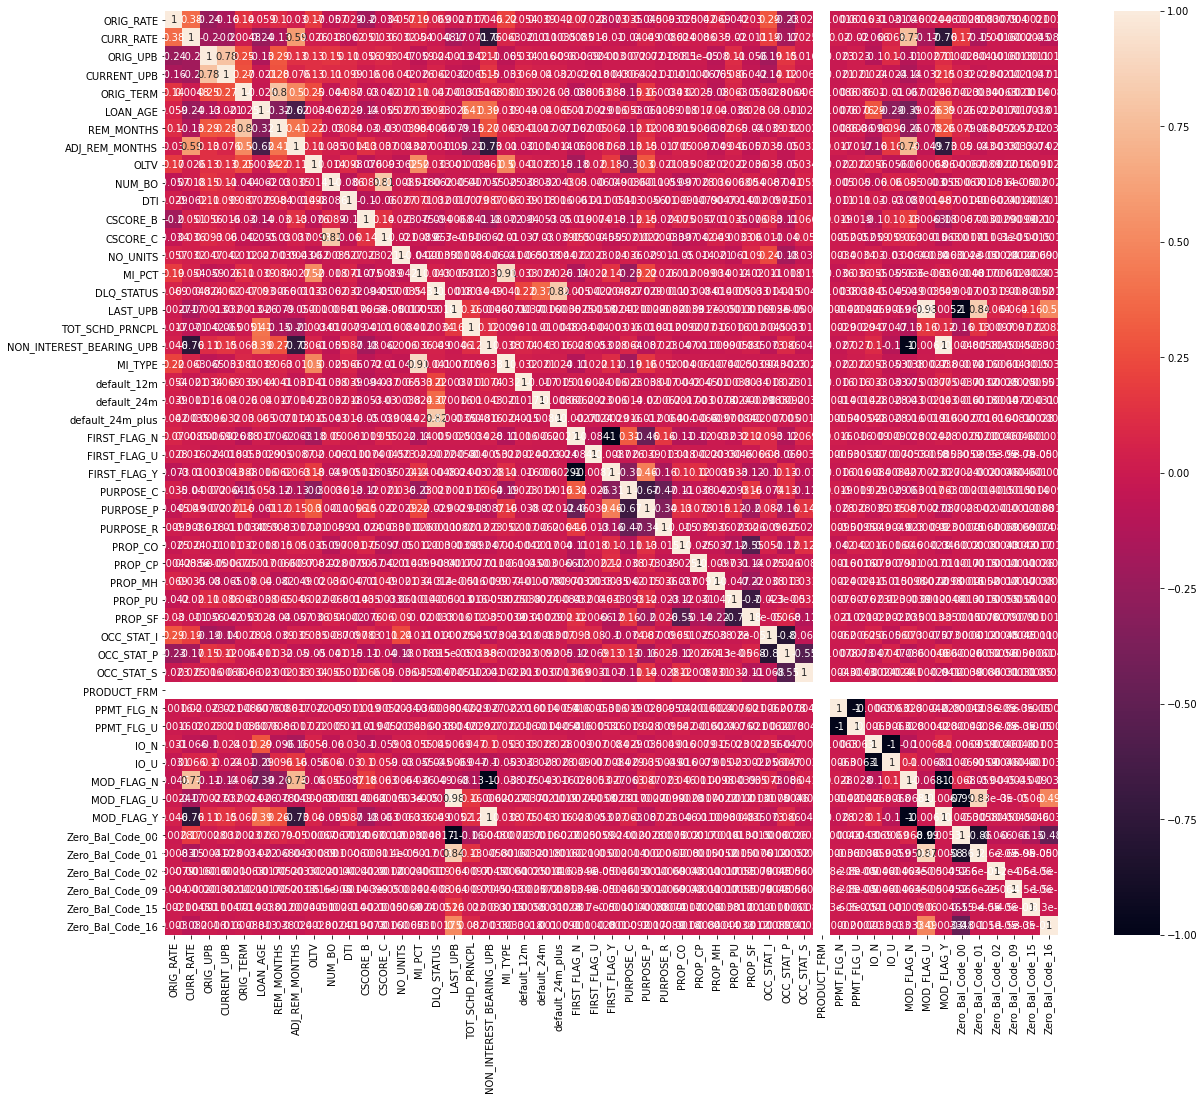

In [255]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True)

## somer's D

In [262]:
import scipy.stats as stats 

In [261]:
from scipy.stats import somersd

ImportError: cannot import name 'somersd' from 'scipy.stats' (c:\Users\kgammie\Anaconda3_\envs\plotly_eda_3.8\lib\site-packages\scipy\stats\__init__.py)

In [266]:

def importance_dt():
    regr_1 = DecisionTreeRegressor()
    regr_1 = regr_1.fit(cniX, cniY)
    print(mean_squared_error(regr_1.predict(cniX), cniY))
    print(regr_1.score(cniX, cniY))
    importance_dt = pd.DataFrame([cniX.columns.values, regr_1.feature_importances_]).T.sort(1, ascending = False)
    return importance_dt

In [275]:
def importance_foreward(yVar, xVar, indata, stopn = 4):

    flist = []
    nx = min(len(xVar), stopn)

    while len(flist) < nx:
        best_score = -np.inf
        for i in xVar:
            newflist = flist + [i]
            f = yVar + ' ~ ' + '+'.join(newflist)
            reg = smf.ols(formula = str(f), data = indata).fit()
            score = reg.fvalue
            if score > best_score:
                best_score, record_i, record_newflist = score, i, newflist
        flist = record_newflist
        print(flist)
        xVar.remove(record_i)
        print(len(xVar))
    finmodel =  smf.ols(formula = str(yVar + ' ~ ' + '+'.join(flist)), data = indata).fit()
    print(finmodel.summary())
    return flist

# train_test


## default_12m

In [281]:
date_cols 

NameError: name 'date_cols' is not defined

In [285]:
# drop default_24m_plus, default_24m, ORIG_DATE, current_month, ZB_DTE, FIRST_PAY, MATR_DT
cols_to_drop_12m = ['default_24m_plus', 'default_24m', 'DLQ_STATUS', 'ORIG_DATE', 'current_month', 'ZB_DTE', 'FIRST_PAY', 'MATR_DT']
df_12m = dummies_clean_df.drop(cols_to_drop_12m, axis=1)
Y_12m = df_12m['default_12m']
X_12m = df_12m.drop(['default_12m'], axis=1)

In [286]:
# train test split
from sklearn.model_selection import train_test_split
X_train_12m, X_test_12m, y_train_12m, y_test_12m = train_test_split(X_12m, Y_12m, test_size=0.2, random_state=42)

In [287]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_12m, y_train_12m)
y_pred_12m = logreg.predict(X_test_12m)


NameError: name 'accuracy_score' is not defined

In [288]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, auc
print(accuracy_score(y_test_12m, y_pred_12m))

0.9709962552897837


In [290]:
roc_12m = roc_auc_score(y_test_12m, y_pred_12m)
print(roc_12m)

0.5


In [294]:
y_pred_proba = logreg.predict_proba(X_test_12m)[::,1]
fpr, tpr, _ = roc_curve(y_test_12m,  y_pred_proba)

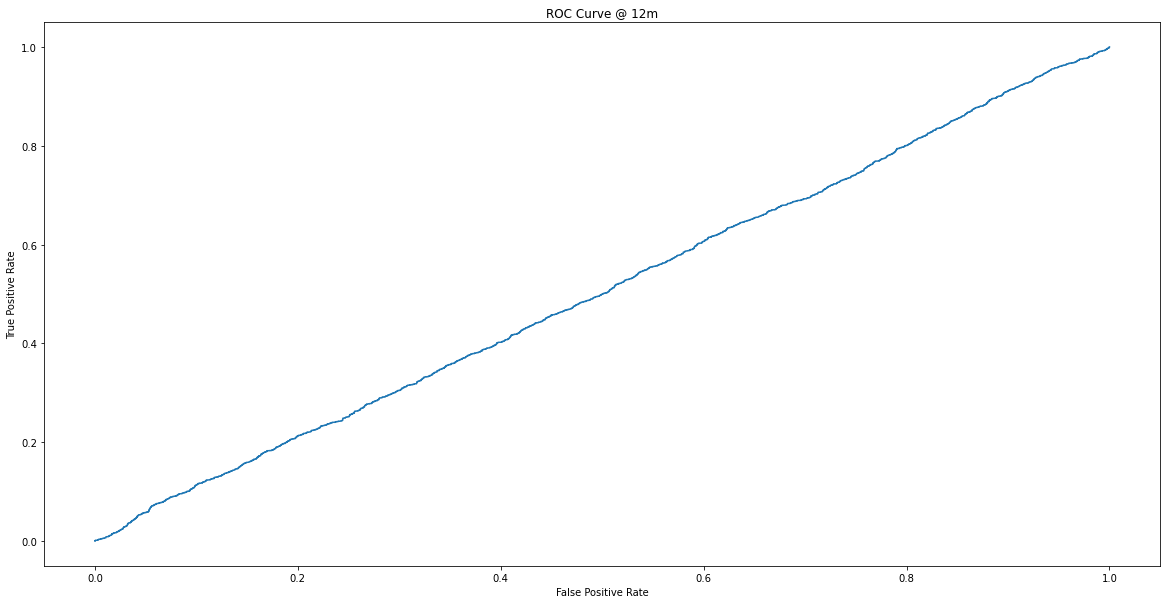

In [293]:
#create ROC curve
plt.title('ROC Curve @ 12m')
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## random forest

In [295]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_12m, y_train_12m)
y_pred_rf = rf.predict(X_test_12m)
print(accuracy_score(y_test_12m, y_pred_rf))


0.9925866915637463


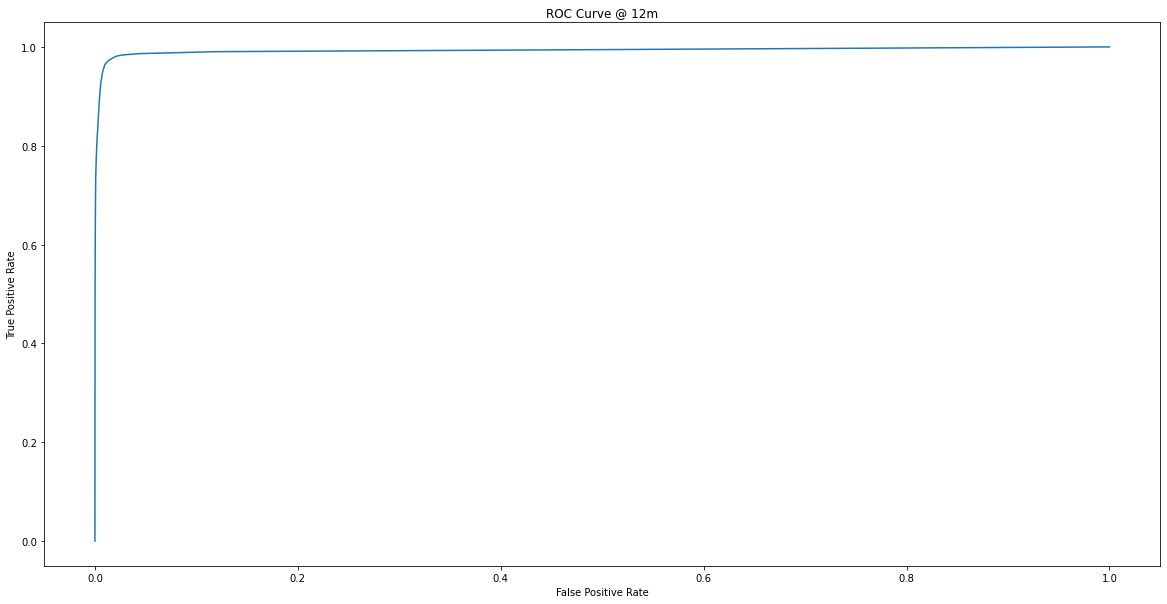

In [296]:
y_pred_proba_rf = rf.predict_proba(X_test_12m)[::,1]
fpr_rf, tpr_rf, _rf = roc_curve(y_test_12m,  y_pred_proba_rf)

plt.title('ROC Curve @ 12m')
plt.plot(fpr_rf,tpr_rf)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [297]:
importances = rf.feature_importances_

In [303]:
X_train_12m.columns.values

array(['LOAN_ID', 'ORIG_RATE', 'CURR_RATE', 'ORIG_UPB', 'CURRENT_UPB',
       'ORIG_TERM', 'LOAN_AGE', 'REM_MONTHS', 'ADJ_REM_MONTHS', 'OLTV',
       'NUM_BO', 'DTI', 'CSCORE_B', 'CSCORE_C', 'NO_UNITS', 'MI_PCT',
       'LAST_UPB', 'TOT_SCHD_PRNCPL', 'NON_INTEREST_BEARING_UPB',
       'MI_TYPE', 'FIRST_FLAG_N', 'FIRST_FLAG_U', 'FIRST_FLAG_Y',
       'PURPOSE_C', 'PURPOSE_P', 'PURPOSE_R', 'PROP_CO', 'PROP_CP',
       'PROP_MH', 'PROP_PU', 'PROP_SF', 'OCC_STAT_I', 'OCC_STAT_P',
       'OCC_STAT_S', 'PRODUCT_FRM', 'PPMT_FLG_N', 'PPMT_FLG_U', 'IO_N',
       'IO_U', 'MOD_FLAG_N', 'MOD_FLAG_U', 'MOD_FLAG_Y',
       'Zero_Bal_Code_00', 'Zero_Bal_Code_01', 'Zero_Bal_Code_02',
       'Zero_Bal_Code_09', 'Zero_Bal_Code_15', 'Zero_Bal_Code_16'],
      dtype=object)

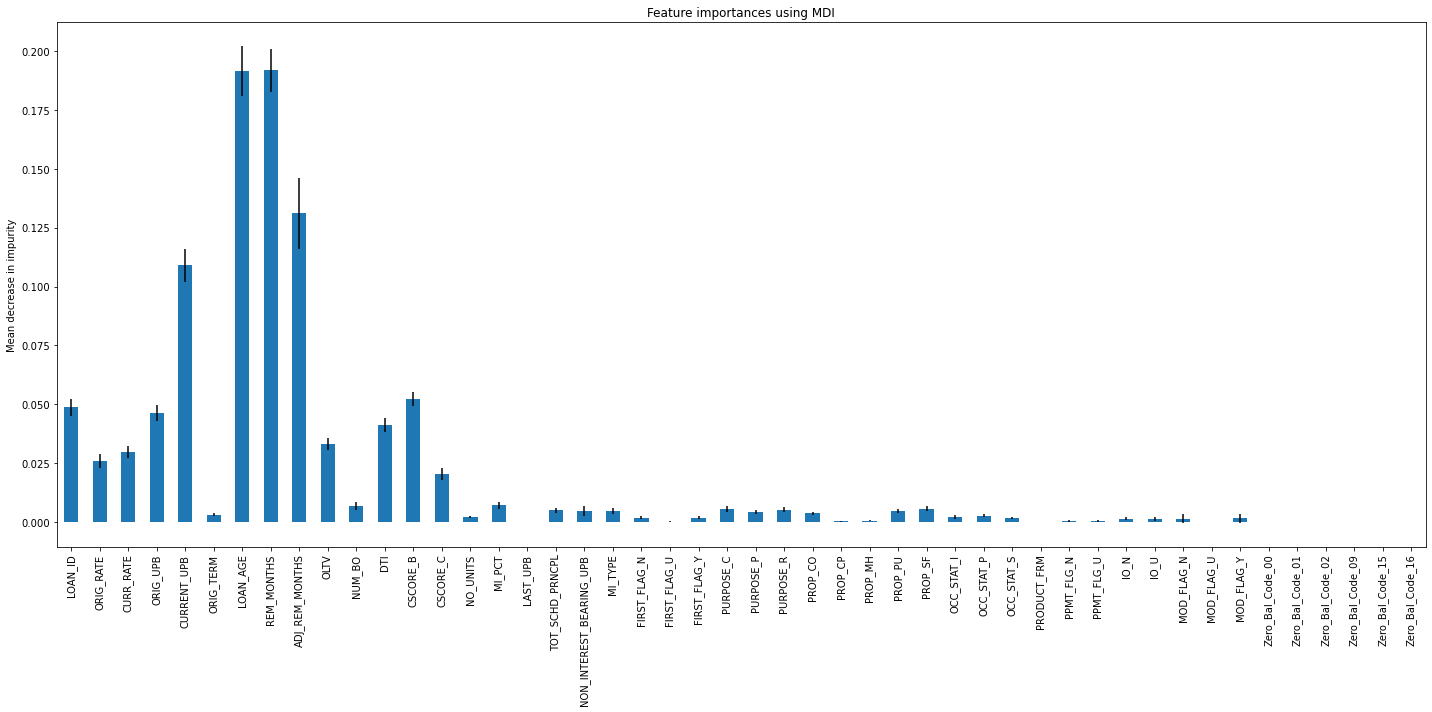

In [304]:
# feature_names = [f"feature {i}" for i in range(X_train_12m.shape[1])]

feature_names = X_train_12m.columns.to_list()

forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [311]:
dummies_clean_df['index_col'] = dummies_clean_df['LOAN_ID'] + "_" + dummies_clean_df['current_month'].astype(str)

dummies_clean_df.head()

,LOAN_ID,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,FIRST_PAY,LOAN_AGE,REM_MONTHS,ADJ_REM_MONTHS,MATR_DT,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,NO_UNITS,MI_PCT,DLQ_STATUS,ZB_DTE,LAST_UPB,TOT_SCHD_PRNCPL,NON_INTEREST_BEARING_UPB,MI_TYPE,current_month,default_12m,default_24m,default_24m_plus,FIRST_FLAG_N,FIRST_FLAG_U,FIRST_FLAG_Y,PURPOSE_C,PURPOSE_P,PURPOSE_R,PROP_CO,PROP_CP,PROP_MH,PROP_PU,PROP_SF,OCC_STAT_I,OCC_STAT_P,OCC_STAT_S,PRODUCT_FRM,PPMT_FLG_N,PPMT_FLG_U,IO_N,IO_U,MOD_FLAG_N,MOD_FLAG_U,MOD_FLAG_Y,Zero_Bal_Code_00,Zero_Bal_Code_01,Zero_Bal_Code_02,Zero_Bal_Code_09,Zero_Bal_Code_15,Zero_Bal_Code_16,index_col
0,100001007633,5.875,5.875,190000.0,0.0,360,2007-02-20,2007-04-20,2,358,357,2037-03-20,80,2,27,802,817,1,-1.0,0,2000-01-20,-999999.99,-999999.99,-999999.99,0,2007-04-30,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,100001007633_2007-04-30
1,100001007633,5.875,5.875,190000.0,0.0,360,2007-02-20,2007-04-20,3,357,356,2037-03-20,80,2,27,802,817,1,-1.0,0,2000-01-20,-999999.99,-999999.99,-999999.99,0,2007-05-31,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,100001007633_2007-05-31
2,100001007633,5.875,5.875,190000.0,0.0,360,2007-02-20,2007-04-20,4,356,355,2037-03-20,80,2,27,802,817,1,-1.0,0,2000-01-20,-999999.99,-999999.99,-999999.99,0,2007-06-30,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,100001007633_2007-06-30
3,100001007633,5.875,5.875,190000.0,0.0,360,2007-02-20,2007-04-20,5,355,355,2037-03-20,80,2,27,802,817,1,-1.0,0,2000-01-20,-999999.99,-999999.99,-999999.99,0,2007-07-31,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,100001007633_2007-07-31
4,100001007633,5.875,5.875,190000.0,0.0,360,2007-02-20,2007-04-20,6,354,353,2037-03-20,80,2,27,802,817,1,-1.0,0,2000-01-20,-999999.99,-999999.99,-999999.99,0,2007-08-31,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,100001007633_2007-08-31


In [313]:
modelling_df = dummies_clean_df.set_index('index_col')
modelling_df.head()

,LOAN_ID,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,FIRST_PAY,LOAN_AGE,REM_MONTHS,ADJ_REM_MONTHS,MATR_DT,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,NO_UNITS,MI_PCT,DLQ_STATUS,ZB_DTE,LAST_UPB,TOT_SCHD_PRNCPL,NON_INTEREST_BEARING_UPB,MI_TYPE,current_month,default_12m,default_24m,default_24m_plus,FIRST_FLAG_N,FIRST_FLAG_U,FIRST_FLAG_Y,PURPOSE_C,PURPOSE_P,PURPOSE_R,PROP_CO,PROP_CP,PROP_MH,PROP_PU,PROP_SF,OCC_STAT_I,OCC_STAT_P,OCC_STAT_S,PRODUCT_FRM,PPMT_FLG_N,PPMT_FLG_U,IO_N,IO_U,MOD_FLAG_N,MOD_FLAG_U,MOD_FLAG_Y,Zero_Bal_Code_00,Zero_Bal_Code_01,Zero_Bal_Code_02,Zero_Bal_Code_09,Zero_Bal_Code_15,Zero_Bal_Code_16
index_col,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001007633_2007-04-30,100001007633,5.875,5.875,190000.0,0.0,360,2007-02-20,2007-04-20,2,358,357,2037-03-20,80,2,27,802,817,1,-1.0,0,2000-01-20,-999999.99,-999999.99,-999999.99,0,2007-04-30,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0
100001007633_2007-05-31,100001007633,5.875,5.875,190000.0,0.0,360,2007-02-20,2007-04-20,3,357,356,2037-03-20,80,2,27,802,817,1,-1.0,0,2000-01-20,-999999.99,-999999.99,-999999.99,0,2007-05-31,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0
100001007633_2007-06-30,100001007633,5.875,5.875,190000.0,0.0,360,2007-02-20,2007-04-20,4,356,355,2037-03-20,80,2,27,802,817,1,-1.0,0,2000-01-20,-999999.99,-999999.99,-999999.99,0,2007-06-30,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0
100001007633_2007-07-31,100001007633,5.875,5.875,190000.0,0.0,360,2007-02-20,2007-04-20,5,355,355,2037-03-20,80,2,27,802,817,1,-1.0,0,2000-01-20,-999999.99,-999999.99,-999999.99,0,2007-07-31,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0
100001007633_2007-08-31,100001007633,5.875,5.875,190000.0,0.0,360,2007-02-20,2007-04-20,6,354,353,2037-03-20,80,2,27,802,817,1,-1.0,0,2000-01-20,-999999.99,-999999.99,-999999.99,0,2007-08-31,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0


## default_24m

In [314]:
# drop default_24m_plus, default_12m, ORIG_DATE, current_month, ZB_DTE, FIRST_PAY, MATR_DT
# set loan_id as index
cols_to_drop_24m = ['LOAN_ID','default_24m_plus', 'default_12m', 'DLQ_STATUS', 'ORIG_DATE', 'current_month', 'ZB_DTE', 'FIRST_PAY', 'MATR_DT']
df_24m = modelling_df.drop(cols_to_drop_24m, axis=1)
Y_24m = df_24m['default_24m']
X_24m = df_24m.drop(['default_24m'], axis=1)

In [315]:
# train test split
from sklearn.model_selection import train_test_split
X_train_24m, X_test_24m, y_train_24m, y_test_24m = train_test_split(X_24m, Y_24m, test_size=0.2, random_state=42)

In [316]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logreg_24m = LogisticRegression()
logreg_24m.fit(X_train_24m, y_train_24m)
y_pred_24m = logreg_24m.predict(X_test_24m)


In [318]:
print(f"Accuracy: {accuracy_score(y_test_24m, y_pred_24m)}")
print(f"ROC score: {roc_auc_score(y_test_24m, y_pred_24m)}")

Accuracy: 0.990440333269061
ROC score: 0.5010154623662615


In [320]:
y_pred_proba_24m = logreg_24m.predict_proba(X_test_24m)[::,1]
fpr24m, tpr24m, _24m = roc_curve(y_test_24m,  y_pred_proba_24m)

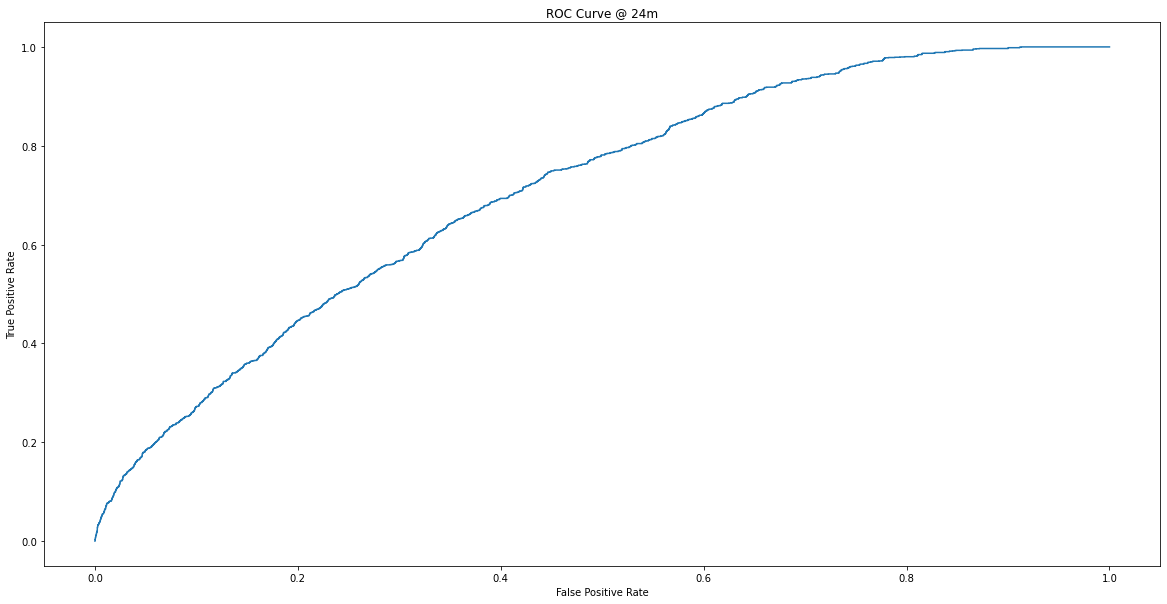

In [321]:
#create ROC curve
plt.title('ROC Curve @ 24m')
plt.plot(fpr24m, tpr24m)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [323]:
rf24 = RandomForestClassifier(n_estimators=50, random_state=42)
rf24.fit(X_train_24m, y_train_24m)
y_pred_rf24 = rf24.predict(X_test_24m)

print(f"Accuracy: {accuracy_score(y_test_24m, y_pred_rf24)}")
print(f"ROC score: {roc_auc_score(y_test_24m, y_pred_rf24)}")


Accuracy: 0.9980921259602797
ROC score: 0.9292389740725223


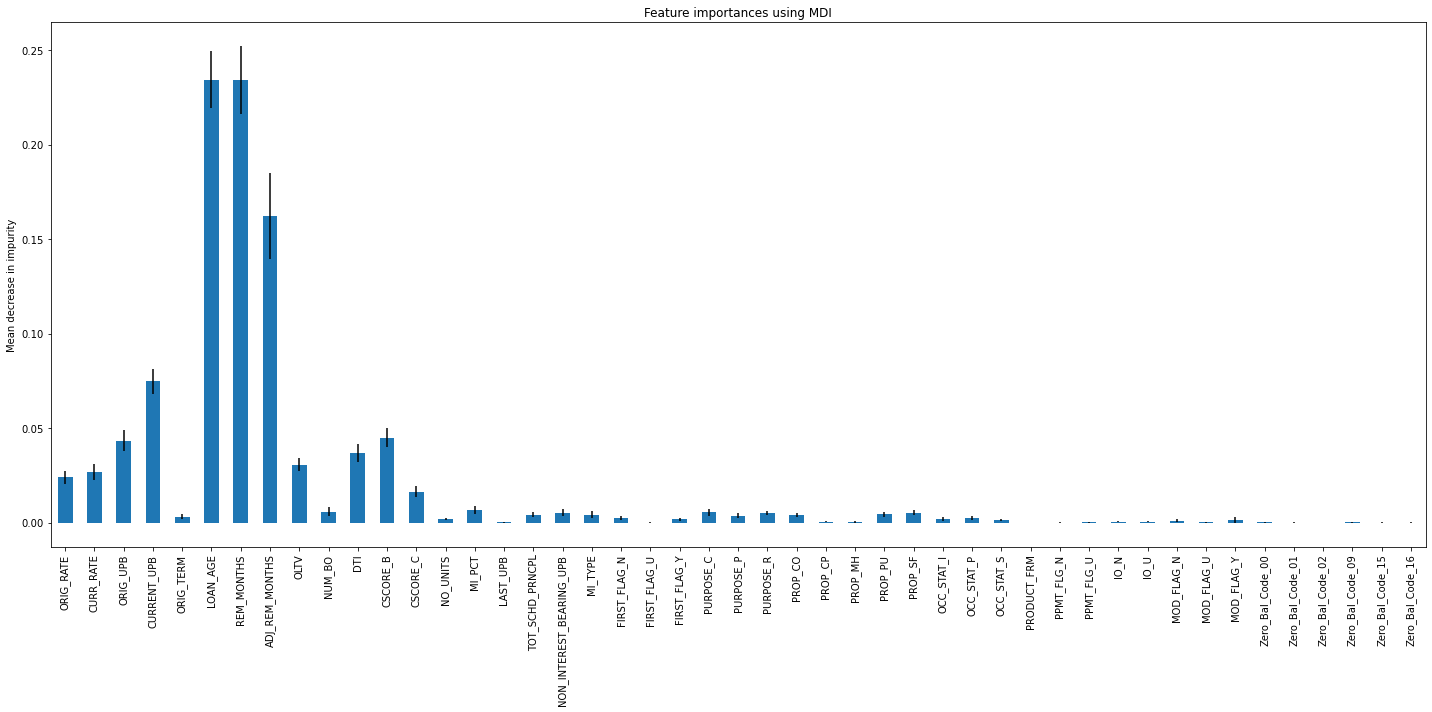

In [324]:
# feature_names = [f"feature {i}" for i in range(X_train_12m.shape[1])]
importances = rf24.feature_importances_
feature_names = X_train_24m.columns.to_list()

forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in rf24.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Scratchpad

In [86]:
df_subset = clean_df.sample(n=250_000)
 # drop na
df_subset = df_subset.dropna()
df_subset.head()

,LOAN_ID,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,FIRST_PAY,LOAN_AGE,MATR_DT,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,MI_PCT,PRODUCT,PPMT_FLG,IO,DLQ_STATUS,MOD_FLAG,Zero_Bal_Code,ZB_DTE,LAST_UPB,TOT_SCHD_PRNCPL,NON_INTEREST_BEARING_UPB,MI_TYPE
202719,257724402329,6.125,6.125,107000.00,87681.33,360,102007,122007,130,112037,90,1,24,779,-1,Y,P,CP,1,P,25.00,FRM,N,N,00,N,00,012000,-999999.99,-999999.99,-999999.99,1
224741,161617607745,6.625,6.625,185000.00,177229.25,360,082007,102007,76,102053,54,1,52,645,-1,N,C,SF,1,P,-1.00,FRM,N,N,00,Y,00,012000,-999999.99,-999999.99,0.00,0
15586,349260349781,6.625,6.625,126000.00,120294.70,360,052007,072007,45,062037,66,1,56,733,-1,N,C,SF,1,I,-1.00,FRM,N,N,00,N,00,012000,-999999.99,-999999.99,-999999.99,0
36447,499000762653,6.000,6.000,260000.00,253996.58,360,112007,012008,22,122037,70,1,29,779,-1,Y,P,SF,2,P,-1.00,FRM,N,N,00,N,00,012000,-999999.99,-999999.99,-999999.99,0
111696,839710976619,5.875,5.875,185000.00,180620.34,360,122007,022008,21,012038,48,2,28,765,787,N,P,CO,1,S,-1.00,FRM,N,N,00,N,00,012000,-999999.99,-999999.99,-999999.99,0


In [87]:
# str -> float
df_subset[float_columns] = df_subset[float_columns].astype('float')

# str -> float (will convert to int after nans have been dealt with)
df_subset[int_columns] = df_subset[int_columns].astype('int32')

df_subset[date_columns] = df_subset[date_columns].apply(pd.to_datetime, axis=1)

df_subset['current_month'] = (df_subset["ORIG_DATE"] + pd.to_timedelta(df_subset['LOAN_AGE']*31,'d')) + pd.offsets.MonthEnd(0)

df_subset['macro_yr'] = df_subset['current_month'].dt.strftime('%Y-%m-%d').str[:4]

In [64]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 220540 to 220230
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   LOAN_ID                   10000 non-null  object        
 1   ORIG_RATE                 10000 non-null  float64       
 2   CURR_RATE                 10000 non-null  float64       
 3   ORIG_UPB                  10000 non-null  float64       
 4   CURRENT_UPB               10000 non-null  float64       
 5   ORIG_TERM                 10000 non-null  int32         
 6   ORIG_DATE                 10000 non-null  datetime64[ns]
 7   FIRST_PAY                 10000 non-null  datetime64[ns]
 8   LOAN_AGE                  10000 non-null  int32         
 9   MATR_DT                   10000 non-null  datetime64[ns]
 10  OLTV                      10000 non-null  int32         
 11  NUM_BO                    10000 non-null  int32         
 12  DTI         

# import macro_data


In [65]:
macro = pd.read_csv('C:/Users/kgammie/Documents/Ad-hoc/PiT_vs_TTC/PiT_RiskDrivers/PiT_RiskDrivers/Macro/us_macro_data__2000_2021_formatted.csv')
macro['macro_yr'] = macro['Year'].astype(str)
macro = macro.drop(['Year'], axis=1)
macro.head()

,Unemployment_Rate,GDP,GDP_Growth,Inflation,Real_Interest_Rate,Lending_Interest_Rate,NonPerforming_Loans_to_Total_Loans,Mortgage_Debt_Service_Payment,30Yr_Fixed_Mortgage_Average,Delinquency_Rates_SF,macro_yr
0,0.0399,1.025095e+13,0.040772,0.033769,0.068134,0.092333,0.010225,0.056382,0.080535,0.020825,2000
1,0.0473,1.058193e+13,0.009543,0.028262,0.045658,0.069217,0.012975,0.057891,0.069679,0.022950,2001
2,0.0578,1.092911e+13,0.016959,0.015860,0.030686,0.046750,0.014725,0.058068,0.065373,0.021125,2002
3,0.0599,1.145644e+13,0.027962,0.022701,0.021073,0.041225,0.012975,0.058280,0.058270,0.018275,2003
4,0.0553,1.221719e+13,0.038526,0.026772,0.016123,0.043400,0.009550,0.058966,0.058392,0.015525,2004


In [88]:
# join df_subset and macro
df_subset = df_subset.merge(macro, on='macro_yr', how='left')

df_subset.head()

,LOAN_ID,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,FIRST_PAY,LOAN_AGE,MATR_DT,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,MI_PCT,PRODUCT,PPMT_FLG,IO,DLQ_STATUS,MOD_FLAG,Zero_Bal_Code,ZB_DTE,LAST_UPB,TOT_SCHD_PRNCPL,NON_INTEREST_BEARING_UPB,MI_TYPE,current_month,macro_yr,Unemployment_Rate,GDP,GDP_Growth,Inflation,Real_Interest_Rate,Lending_Interest_Rate,NonPerforming_Loans_to_Total_Loans,Mortgage_Debt_Service_Payment,30Yr_Fixed_Mortgage_Average,Delinquency_Rates_SF
0,257724402329,6.125,6.125,107000.0,87681.33,360,2007-10-20,2007-12-20,130,2037-11-20,90,1,24,779,-1,Y,P,CP,1,P,25.0,FRM,N,N,0,N,00,2000-01-20,-999999.99,-999999.99,-999999.99,1,2018-11-30,2018,0.0390,2.052716e+13,0.029189,0.024426,0.024565,0.049042,0.010150,0.041604,0.045446,0.031200
1,161617607745,6.625,6.625,185000.0,177229.25,360,2007-08-20,2007-10-20,76,2053-10-20,54,1,52,645,-1,N,C,SF,1,P,-1.0,FRM,N,N,0,Y,00,2000-01-20,-999999.99,-999999.99,0.00,0,2014-01-31,2014,0.0617,1.755068e+13,0.022878,0.016222,0.013548,0.032500,0.022100,0.046343,0.041689,0.072000
2,349260349781,6.625,6.625,126000.0,120294.70,360,2007-05-20,2007-07-20,45,2037-06-20,66,1,56,733,-1,N,C,SF,1,I,-1.0,FRM,N,N,0,N,00,2000-01-20,-999999.99,-999999.99,-999999.99,0,2011-03-31,2011,0.0895,1.559973e+13,0.015499,0.031568,0.011484,0.032500,0.044975,0.055861,0.044479,0.104000
3,499000762653,6.000,6.000,260000.0,253996.58,360,2007-11-20,2008-01-20,22,2037-12-20,70,1,29,779,-1,Y,P,SF,2,P,-1.0,FRM,N,N,0,N,00,2000-01-20,-999999.99,-999999.99,-999999.99,0,2009-10-31,2009,0.0925,1.447806e+13,-0.025999,-0.003555,0.025924,0.032500,0.046975,0.067055,0.050365,0.091375
4,839710976619,5.875,5.875,185000.0,180620.34,360,2007-12-20,2008-02-20,21,2038-01-20,48,2,28,765,787,N,P,CO,1,S,-1.0,FRM,N,N,0,N,00,2000-01-20,-999999.99,-999999.99,-999999.99,0,2009-10-31,2009,0.0925,1.447806e+13,-0.025999,-0.003555,0.025924,0.032500,0.046975,0.067055,0.050365,0.091375


In [89]:
df_subset['default_12m'] = np.where(df_subset['DLQ_STATUS'].between(3, 12), 1, 0)
df_subset['default_24m'] = np.where(df_subset['DLQ_STATUS'].between(13, 24), 1, 0)
df_subset['default_24m_plus'] = np.where(df_subset['DLQ_STATUS'] > 24, 1, 0)

obj_cols = ['FIRST_FLAG', 'PURPOSE', 'PROP', 'OCC_STAT', 'PRODUCT', 'PPMT_FLG', 'IO', 'MOD_FLAG', 'Zero_Bal_Code']

df_subset = pd.get_dummies(df_subset, columns=obj_cols)
df_subset.head()

,LOAN_ID,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,FIRST_PAY,LOAN_AGE,MATR_DT,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,NO_UNITS,MI_PCT,DLQ_STATUS,ZB_DTE,LAST_UPB,TOT_SCHD_PRNCPL,NON_INTEREST_BEARING_UPB,MI_TYPE,current_month,macro_yr,Unemployment_Rate,GDP,GDP_Growth,Inflation,Real_Interest_Rate,Lending_Interest_Rate,NonPerforming_Loans_to_Total_Loans,Mortgage_Debt_Service_Payment,30Yr_Fixed_Mortgage_Average,Delinquency_Rates_SF,default_12m,default_24m,default_24m_plus,FIRST_FLAG_N,FIRST_FLAG_U,FIRST_FLAG_Y,PURPOSE_C,PURPOSE_P,PURPOSE_R,PROP_CO,PROP_CP,PROP_MH,PROP_PU,PROP_SF,OCC_STAT_I,OCC_STAT_P,OCC_STAT_S,PRODUCT_FRM,PPMT_FLG_N,PPMT_FLG_U,IO_N,IO_U,MOD_FLAG_N,MOD_FLAG_U,MOD_FLAG_Y,Zero_Bal_Code_00,Zero_Bal_Code_01,Zero_Bal_Code_15,Zero_Bal_Code_16
0,257724402329,6.125,6.125,107000.0,87681.33,360,2007-10-20,2007-12-20,130,2037-11-20,90,1,24,779,-1,1,25.0,0,2000-01-20,-999999.99,-999999.99,-999999.99,1,2018-11-30,2018,0.0390,2.052716e+13,0.029189,0.024426,0.024565,0.049042,0.010150,0.041604,0.045446,0.031200,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0
1,161617607745,6.625,6.625,185000.0,177229.25,360,2007-08-20,2007-10-20,76,2053-10-20,54,1,52,645,-1,1,-1.0,0,2000-01-20,-999999.99,-999999.99,0.00,0,2014-01-31,2014,0.0617,1.755068e+13,0.022878,0.016222,0.013548,0.032500,0.022100,0.046343,0.041689,0.072000,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0
2,349260349781,6.625,6.625,126000.0,120294.70,360,2007-05-20,2007-07-20,45,2037-06-20,66,1,56,733,-1,1,-1.0,0,2000-01-20,-999999.99,-999999.99,-999999.99,0,2011-03-31,2011,0.0895,1.559973e+13,0.015499,0.031568,0.011484,0.032500,0.044975,0.055861,0.044479,0.104000,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0
3,499000762653,6.000,6.000,260000.0,253996.58,360,2007-11-20,2008-01-20,22,2037-12-20,70,1,29,779,-1,2,-1.0,0,2000-01-20,-999999.99,-999999.99,-999999.99,0,2009-10-31,2009,0.0925,1.447806e+13,-0.025999,-0.003555,0.025924,0.032500,0.046975,0.067055,0.050365,0.091375,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0
4,839710976619,5.875,5.875,185000.0,180620.34,360,2007-12-20,2008-02-20,21,2038-01-20,48,2,28,765,787,1,-1.0,0,2000-01-20,-999999.99,-999999.99,-999999.99,0,2009-10-31,2009,0.0925,1.447806e+13,-0.025999,-0.003555,0.025924,0.032500,0.046975,0.067055,0.050365,0.091375,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0


In [95]:
df_12m = df_subset[df_subset['default_24m_plus'] == 1]
df_12m['DLQ_STATUS'].unique()

array([30, 35, 69, 34, 27, 31, 50, 61, 80, 77, 55, 26, 99, 25, 49, 51, 92,
       36, 29, 40, 84, 68, 85, 65, 76, 33, 66, 62, 53, 91, 56, 39, 46, 71,
       41, 43, 63, 47, 45, 60, 54, 32, 52, 42, 37, 83, 75, 73, 28, 58, 93,
       78, 38, 64, 67, 98, 57, 94, 48, 44, 59, 79, 82, 81, 95, 70, 74, 89,
       87, 86, 72, 88, 90, 96, 97])

In [106]:
# get list of loan_id where default_12m = 1
df_12m_default_12m = df_subset[df_subset['default_12m'] == 1]['LOAN_ID'].unique()
df_12m_default_12m

array(['974743160375', '615337651274', '739793031286', ...,
       '750380340719', '448683170168', '533463936195'], dtype=object)

## corr

In [92]:
# corr_matrix = df_subset.corr()
corr_matrix['default_12m'].sort_values(ascending=False)


default_12m                           1.000000
MOD_FLAG_Y                            0.103323
NON_INTEREST_BEARING_UPB              0.103167
DLQ_STATUS                            0.099827
CURRENT_UPB                           0.099601
ORIG_UPB                              0.065481
Delinquency_Rates_SF                  0.059585
ORIG_RATE                             0.057763
Unemployment_Rate                     0.056360
LOAN_AGE                              0.054296
NonPerforming_Loans_to_Total_Loans    0.050561
ORIG_TERM                             0.047424
DTI                                   0.047240
OLTV                                  0.045582
IO_N                                  0.042680
GDP                                   0.041621
PROP_SF                               0.037566
TOT_SCHD_PRNCPL                       0.031422
PURPOSE_C                             0.031017
MI_TYPE                               0.025240
MI_PCT                                0.023534
GDP_Growth   

In [91]:
corr_matrix

,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,LOAN_AGE,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,NO_UNITS,MI_PCT,DLQ_STATUS,LAST_UPB,TOT_SCHD_PRNCPL,NON_INTEREST_BEARING_UPB,MI_TYPE,Unemployment_Rate,GDP,GDP_Growth,Inflation,Real_Interest_Rate,Lending_Interest_Rate,NonPerforming_Loans_to_Total_Loans,Mortgage_Debt_Service_Payment,30Yr_Fixed_Mortgage_Average,Delinquency_Rates_SF,default_12m,default_24m,default_24m_plus,FIRST_FLAG_N,FIRST_FLAG_U,FIRST_FLAG_Y,PURPOSE_C,PURPOSE_P,PURPOSE_R,PROP_CO,PROP_CP,PROP_MH,PROP_PU,PROP_SF,OCC_STAT_I,OCC_STAT_P,OCC_STAT_S,PRODUCT_FRM,PPMT_FLG_N,PPMT_FLG_U,IO_N,IO_U,MOD_FLAG_N,MOD_FLAG_U,MOD_FLAG_Y,Zero_Bal_Code_00,Zero_Bal_Code_01,Zero_Bal_Code_15,Zero_Bal_Code_16
ORIG_RATE,1.000000,0.311823,-0.110521,-0.054367,0.209865,0.028893,0.178196,-0.037641,0.041075,-0.171924,-0.005591,0.038142,0.156555,0.091965,-0.001531,0.010780,0.071603,0.195652,-0.009084,0.047648,0.013822,-0.010526,-0.042958,-0.039738,-0.010328,-0.053057,-0.049427,0.001893,0.057763,0.049561,0.076846,0.084311,0.040467,-0.087950,0.039180,-0.040739,0.001805,-0.016565,-0.041408,0.047192,-0.020868,0.042345,0.221971,-0.194468,0.010485,NaN,-0.002748,0.002748,-0.000906,0.000906,-0.070985,-0.002279,0.071283,0.001772,-0.004524,0.001691,0.002468
CURR_RATE,0.311823,1.000000,-0.246741,-0.270517,-0.008370,-0.275472,-0.020875,-0.002121,-0.096630,0.087831,0.030358,0.017427,0.032060,-0.000148,-0.147083,-0.089311,-0.786927,0.042825,0.126497,-0.265127,-0.130582,0.044731,0.110223,0.076683,0.140901,0.279481,0.223575,0.082762,-0.047936,-0.023607,0.003762,0.003383,0.024721,-0.005505,-0.043367,0.063766,-0.033794,0.022272,0.063112,0.024774,-0.010346,-0.064033,0.149362,-0.154090,0.047865,NaN,0.040504,-0.040504,-0.080062,0.080062,0.794144,-0.153812,-0.784829,0.149346,-0.126249,-0.002757,-0.088168
ORIG_UPB,-0.110521,-0.246741,1.000000,0.821939,0.224256,-0.062169,0.102395,0.117699,0.167816,-0.031195,0.002411,0.195514,-0.112757,0.074882,0.002863,-0.018342,0.214704,-0.102210,0.010234,-0.052856,-0.035000,0.013190,0.039092,0.028263,0.015490,0.064315,0.059366,-0.001000,0.065481,0.035730,0.054579,-0.023084,-0.034600,0.026093,0.007382,-0.012095,0.007864,0.018668,-0.119092,-0.062454,-0.000795,0.089053,-0.147067,0.144138,-0.033810,NaN,-0.016186,0.016186,-0.062410,0.062410,-0.211635,-0.000806,0.212101,-0.000234,-0.004358,0.004777,0.004396
CURRENT_UPB,-0.054367,-0.270517,0.821939,1.000000,0.258263,0.027203,0.120147,0.087717,0.151564,-0.065518,-0.005709,0.151965,-0.069736,0.116168,-0.032059,-0.039236,0.273598,-0.061308,0.193068,-0.011264,-0.098179,-0.089870,-0.217666,-0.277448,0.209830,-0.035626,-0.112555,0.211627,0.099601,0.062194,0.087940,-0.014527,-0.026967,0.016865,0.014932,-0.023889,0.014927,0.010070,-0.104925,-0.051238,-0.002195,0.082556,-0.116644,0.118232,-0.033685,NaN,-0.015835,0.015835,0.035536,-0.035536,-0.266794,-0.031291,0.269517,0.032293,-0.025547,-0.008462,-0.017841
ORIG_TERM,0.209865,-0.008370,0.224256,0.258263,1.000000,0.002105,0.275828,-0.040160,0.082937,-0.072335,-0.052482,-0.028046,0.152744,0.056927,0.000077,0.009785,0.104014,0.120905,0.001418,0.007836,0.001538,0.004158,-0.008110,-0.005910,0.001000,-0.004526,-0.005408,0.000045,0.047424,0.035652,0.043899,-0.114205,0.005221,0.113997,-0.142017,0.156526,-0.021625,0.033976,0.047921,-0.028296,0.012544,-0.059106,-0.029139,0.016259,0.014904,NaN,-0.007845,0.007845,-0.002902,0.002902,-0.103085,-0.001376,0.103381,0.001195,-0.003068,0.000826,0.001839
LOAN_AGE,0.028893,-0.275472,-0.062169,0.027203,0.002105,1.000000,0.024787,-0.058992,0.038581,-0.130146,-0.037924,0.044132,0.035449,0.153473,-0.028263,0.438371,0.403650,0.035063,-0.280422,0.972463,0.345624,-0.147107,-0.490568,-0.373111,-0.361312,-0.953990,-0.824186,-0.229875,0.054296,0.052657,0.125094,0.023820,0.001797,-0.024024,0.054706,-0.070993,0.026546,-0.024540,-0.007430,0.018522,-0.010165,0.022238,0.029502,-0.012171,-0.022628,NaN,-0.008302,0.008302,0.264185,-0.264185,-0.400803,-0.027586,0.403523,0.028469,-0.022522,-0.007460,-0.015729
OLTV,0.178196,-0.020875,0.102395